In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import ttest_ind

In [ ]:
# Nome do arquivo CSV
nome_arquivo = "/content/drive/MyDrive/Colab Notebooks/Cd_experimento_teste_ab.csv"

# Importa o arquivo JSON como DataFrame
df = pd.read_csv(nome_arquivo)

# Questão 1:

Considerando a base de dados experimento_test_ab.csv responda as
questões abaixo:

1. Qual dos cenários tem a maior taxa de conversão?

In [ ]:
import numpy as np
from scipy.stats import norm

# Carregar os dados do arquivo CSV
dados = pd.read_csv(nome_arquivo)

# Calcular o número total de visualizações e conversões para cada versão da página
total_visualizacoes = dados.groupby('Versão_Página')['Visualizações'].sum()
total_conversoes = dados.groupby('Versão_Página')['Conversões'].sum()

# Calcular a taxa de conversão para cada versão da página
taxa_conversao = total_conversoes / total_visualizacoes

print (taxa_conversao)

# Encontrar o cenário com a maior taxa de conversão
cenario_maior_taxa = taxa_conversao.idxmax()
maior_taxa = taxa_conversao.max()

print("O cenário com a maior taxa de conversão é:", cenario_maior_taxa)
print("A maior taxa de conversão é:", maior_taxa)

Versão_Página
A    0.000696
B    0.000830
dtype: float64
O cenário com a maior taxa de conversão é: B
A maior taxa de conversão é: 0.0008295946268815207


2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

2.1. O cenário A, da base, como o inicial, que funciona hoje

2.2. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05)

2.3. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem

2.4. O aumento para 10% de conversão

In [ ]:
import numpy as np
from scipy.stats import norm

# Definir os parâmetros
alpha = 0.05
beta = 0.2  # 1 - poder do teste
p1 = taxa_conversao['A']  # Taxa de conversão atual do cenário A
p2 = 0.1  # Aumento para 10% de conversão no cenário B

# Calcular os valores Z correspondentes
Z_alpha = norm.ppf(1 - alpha/2)
Z_beta = norm.ppf(1 - beta)

# Calcular o tamanho da amostra
n = (2 * (Z_alpha + Z_beta)**2 * (p1*(1-p1) + p2*(1-p2))) / ((p1 - p2)**2)

print("O tamanho da amostra necessário é:", round(n))


O tamanho da amostra necessário é: 144


# Questão 2:

Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Nome do arquivo CSV
nome_arquivo = "/content/drive/MyDrive/Colab Notebooks/pacientes.csv"

# Importa o arquivo CSV como DataFrame
dados_pacientes = pd.read_csv(nome_arquivo)


In [3]:

dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [4]:
dados_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [5]:
# Calcular o resumo estatístico para variáveis numéricas
summary_stats = dados_pacientes.describe()

# Exibir o resumo estatístico
print(summary_stats)



        Unnamed: 0  Pressao_Arterial        Idade       Genero        Etnia  \
count  1000.000000       1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000        150.375623    49.757000     0.503000     1.526000   
std     288.819436          9.943613    11.682998     0.500241     1.104783   
min       0.000000        112.929821    30.000000     0.000000     0.000000   
25%     249.750000        144.240948    40.000000     0.000000     1.000000   
50%     499.500000        150.455624    49.000000     1.000000     2.000000   
75%     749.250000        156.792113    60.000000     1.000000     3.000000   
max     999.000000        181.803131    70.000000     1.000000     3.000000   

       Estado_Saude  
count    1000.00000  
mean        0.51000  
std         0.50015  
min         0.00000  
25%         0.00000  
50%         1.00000  
75%         1.00000  
max         1.00000  


In [6]:
dados_pacientes.count()

Unnamed: 0           1000
Pressao_Arterial     1000
Idade                1000
Genero               1000
Etnia                1000
Estado_Saude         1000
Nome_Genero          1000
Nome_Etnia           1000
Nome_Estado_Saude    1000
dtype: int64

# Distribuição das variáveis categóricas sexo

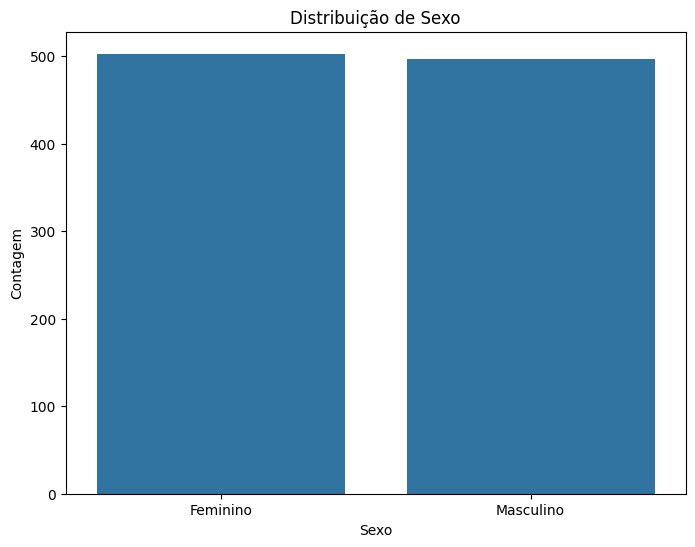

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Mapear os códigos numéricos para os nomes correspondentes
genero_map = {0: 'Masculino', 1: 'Feminino'}
dados_pacientes['Nome_Genero'] = dados_pacientes['Genero'].map(genero_map)

# Gráfico de barras para a distribuição de sexo
sns.countplot(x='Nome_Genero', data=dados_pacientes)
plt.title('Distribuição de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()



In [22]:
print(dados_pacientes['Nome_Genero'].unique())


['Feminino' 'Masculino']


# Correlações - variáveis numéricas

Vamos calcular o coeficiente de correlação de Pearson por padrão, que mede a relação linear entre duas variáveis contínuas para entender se existe alguma relação entre elas. <n>

Valores próximos a 1 indicam uma correlação positiva forte, valores próximos a -1 indicam uma correlação negativa forte, e valores próximos a 0 indicam pouca ou nenhuma correlação.

In [8]:
# Selecionar apenas as colunas numéricas do DataFrame
dados_numericos = dados_pacientes.select_dtypes(include=['int64', 'float64'])

# Calcular as correlações entre as variáveis numéricas
correlacoes = dados_numericos.corr()

# Exibir a matriz de correlações
print(correlacoes)


                  Unnamed: 0  Pressao_Arterial     Idade    Genero     Etnia  \
Unnamed: 0          1.000000          0.031554 -0.007538 -0.003627 -0.001622   
Pressao_Arterial    0.031554          1.000000 -0.021385  0.040632  0.007305   
Idade              -0.007538         -0.021385  1.000000  0.049710  0.019219   
Genero             -0.003627          0.040632  0.049710  1.000000 -0.026404   
Etnia              -0.001622          0.007305  0.019219 -0.026404  1.000000   
Estado_Saude       -0.013187         -0.026399  0.006498  0.001880 -0.022210   

                  Estado_Saude  
Unnamed: 0           -0.013187  
Pressao_Arterial     -0.026399  
Idade                 0.006498  
Genero                0.001880  
Etnia                -0.022210  
Estado_Saude          1.000000  


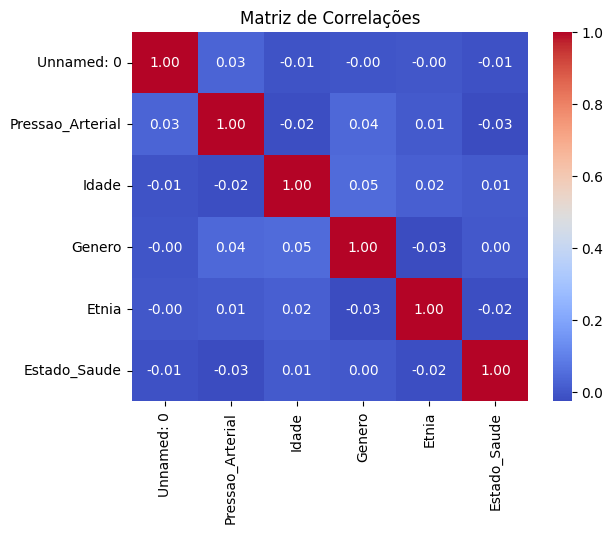

In [9]:
# Plotar um mapa de calor das correlações
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlações')
plt.show()


Este é um mapa de calor das correlações, onde cores mais quentes indicam correlações positivas mais fortes, cores mais frias indicam correlações negativas mais fortes, e cores neutras indicam correlações mais fracas.

# Correlações entre variáveis categóricas nominais

Eu vou usar uma medida de associação como o teste do qui-quadrado (chi-square test) usado para avaliar a independência entre duas variáveis categóricas.

Por exemplo, "Gênero" e "Estado de Saúde".

Explicação: O valor de Qui-Quadrado indica a força da associação entre as duas variáveis. Um valor mais alto indica uma associação mais forte. O valor de p (p-valor) indica a significância estatística da associação. Se o valor de p for menor que um certo limite (geralmente 0.05), então a associação é considerada estatisticamente significativa.

In [10]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre as variáveis 'Genero' e 'Estado_Saude'
tabela_contingencia = pd.crosstab(dados_pacientes['Genero'], dados_pacientes['Estado_Saude'])

# Calcular o teste do qui-quadrado
chi2, p_valor, graus_liberdade, esperados = chi2_contingency(tabela_contingencia)

print("Valor de Qui-Quadrado:", chi2)
print("Valor de p:", p_valor)


Valor de Qui-Quadrado: 0.0
Valor de p: 1.0


Resultado da análise

Valor de Qui-Quadrado: 0.0 </n>
Valor de p: 1.0 </n>

Valor de Qui-Quadrado de 0.0 geralmente indica que não há associação entre as duas variáveis categóricas e as duas variáveis são independentes uma da outra.

Quando o valor de p é 1.0, indica que não há evidências para rejeitar a hipótese nula de independência entre as variáveis. </n>

H0: As variáveis Genero e Estado_Saude estão relacionadas de alguma forma.

Portanto, com um valor de Qui-Quadrado de 0.0 e um valor de p de 1.0, podemos inferir que não há associação estatisticamente significativa entre as duas variáveis categóricas em questão. Elas são independentes uma da outra.

# Selecionando colunas categoricas

In [12]:
# Selecionar apenas as colunas categóricas do DataFrame
dados_categoricos = dados_pacientes.select_dtypes(include=['object'])

# Exibir os valores únicos em cada coluna categórica
for coluna in dados_categoricos.columns:
    print(f"Valores únicos em '{coluna}': {dados_pacientes[coluna].unique()}")


Valores únicos em 'Nome_Genero': ['Feminino' 'Masculino']
Valores únicos em 'Nome_Etnia': ['Afro-americano' 'Asiático' 'Hispânico' 'Caucasiano']
Valores únicos em 'Nome_Estado_Saude': ['Com condições de saúde adicionais' 'Saudável']


Reflexão: Na busca de alguma coluna que pareça representar uma variável ordinal, ou seja Se houvesse poderíamos considerar usar o cálculo da correlação de Spearman entre essa coluna e outras variáveis categóricas ou numéricas. <n>

O coeficiente de correlação de Spearman varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação. O valor de p (p-valor) indica a significância estatística da correlação.

Aprendizado:

Uma variável ordinal é um tipo de variável que possui categorias ou valores que têm uma ordem natural ou hierarquia entre si. Isso significa que os valores podem ser ordenados ou classificados de alguma forma.

Por exemplo, suponha que tenhamos uma variável que represente o nível de educação de uma pessoa, e os valores possíveis são "Ensino Fundamental", "Ensino Médio", "Ensino Técnico" e "Ensino Superior". Nesse caso, os valores têm uma ordem natural, onde "Ensino Superior" está acima de "Ensino Médio" em termos de nível educacional.

Da mesma forma, uma escala de classificação de dor, onde os valores podem ser "Sem Dor", "Dor Leve", "Dor Moderada" e "Dor Severa", também é um exemplo de uma variável ordinal.

As variáveis ordinais são diferentes das variáveis categóricas nominais, onde os valores representam categorias sem uma ordem natural entre elas. Por exemplo, a cor dos olhos (azul, verde, castanho) é uma variável categórica nominal, pois não há uma ordem natural entre essas cores.

Na análise estatística, a correlação de Spearman é frequentemente usada para medir a associação entre variáveis ordinais ou classificadas. Ela é baseada nas classificações ou posições relativas dos valores em vez de nos próprios valores.

# Análise de idade: <n>

Podemos agrupar os pacientes por faixa etária e analisar como diferentes faixas etárias estão distribuídas em relação a outras variáveis, como sexo e condição de saúde.

Faixa_Etaria
0-18       0
19-30     18
31-45    388
46-60    367
61+      227
Name: count, dtype: int64


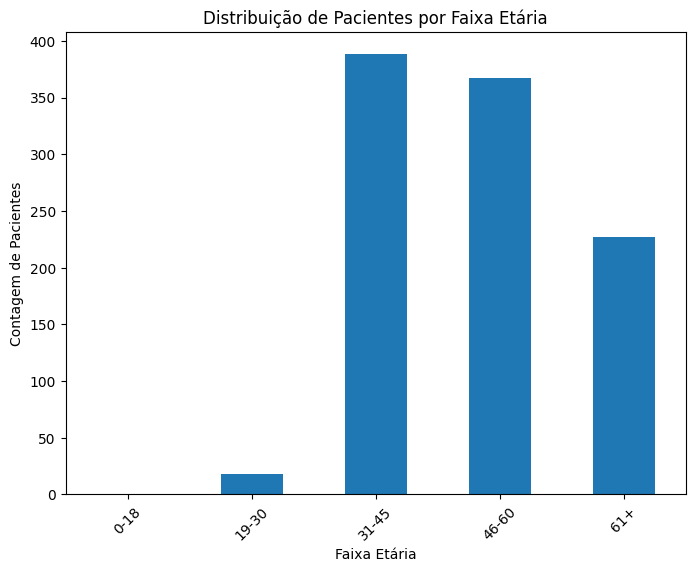

In [13]:
# Definir os intervalos de idade para as faixas etárias
intervalos_idade = [0, 18, 30, 45, 60, 120]  # Definindo faixas de 0-18, 19-30, 31-45, 46-60, 61-120 anos

# Rótulos para as faixas etárias
rotulos_faixas_etarias = ['0-18', '19-30', '31-45', '46-60', '61+']

# Criar uma nova coluna no DataFrame para a faixa etária de cada paciente
dados_pacientes['Faixa_Etaria'] = pd.cut(dados_pacientes['Idade'], bins=intervalos_idade, labels=rotulos_faixas_etarias)

# Visualizar a contagem de pacientes por faixa etária
contagem_por_faixa_etaria = dados_pacientes['Faixa_Etaria'].value_counts().sort_index()
print(contagem_por_faixa_etaria)

# Plotar um gráfico de barras para a distribuição de pacientes por faixa etária
plt.figure(figsize=(8, 6))
contagem_por_faixa_etaria.plot(kind='bar')
plt.title('Distribuição de Pacientes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem de Pacientes')
plt.xticks(rotation=45)
plt.show()


# Análise de IMC (Índice de Massa Corporal): </n>

Podemos calcular o IMC para cada paciente e analisar sua distribuição, bem como sua relação com outras variáveis, como idade e condição de saúde. <n>

1. Calcular o IMC para cada paciente usando a fórmula: IMC = peso (kg) / (altura (m))^2.
2. Analisar a distribuição do IMC.
3. Examinar a relação entre o IMC e outras variáveis, como idade e condição de saúde.

Este código calculará o IMC para cada paciente usando os dados de peso e altura, em seguida, exibirá a distribuição do IMC em um histograma e analisará a relação entre o IMC e a idade em um gráfico de dispersão, colorindo os pontos de acordo com o estado de saúde de cada paciente.

Nota: Neste dataframe não temos o peso, sendo assim podemos considerar um valor padrão para o peso ou solicitar que o usuário forneça os pesos dos pacientes. Mas também não temos altura entao talvez seja melhor solicitar os dados

# Comparar grupos: t-student (comparar a idade média entre homens e mulheres)</n>

Podemos comparar diferentes grupos de pacientes (por exemplo, fumantes vs não fumantes, homens vs mulheres) em termos de suas características e condições de saúde. </n>

Neste exemplo, dividimos o DataFrame em dois grupos com base no gênero (homens e mulheres) e, em seguida, realizamos o teste t de Student para comparar a idade média entre esses grupos. O valor de p nos informa se há uma diferença estatisticamente significativa na idade média entre homens e mulheres.

Você pode aplicar técnicas semelhantes para comparar outros grupos de interesse em relação a diferentes variáveis.

In [16]:
from scipy.stats import ttest_ind

# Dividir o DataFrame em dois grupos: homens e mulheres
dados_homem = dados_pacientes[dados_pacientes['Nome_Genero'] == 'Masculino']
dados_mulher = dados_pacientes[dados_pacientes['Nome_Genero'] == 'Feminino']
media_idade_mulher = dados_mulher['Idade'].mean()
media_idade_homem = dados_homem['Idade'].mean()

# Realizar o teste t de Student para comparar a idade média entre homens e mulheres
t_statistic, p_valor = ttest_ind(dados_homem['Idade'], dados_mulher['Idade'])

print("Média de Idade Mulher",media_idade_mulher)
print("Média de Idade Homem",media_idade_homem)
print("Teste t de Student:")
print("Estatística t:", t_statistic)
print("Valor de p:", p_valor)

# Interpretar o resultado do teste
if p_valor < 0.05:
    print("Há evidências estatísticas de diferença significativa na idade média entre homens e mulheres.")
else:
    print("Não há evidências estatísticas de diferença significativa na idade média entre homens e mulheres.")


Média de Idade Mulher 50.33399602385686
Média de Idade Homem 49.17303822937626
Teste t de Student:
Estatística t: -1.5723314039291474
Valor de p: 0.11619066853739046
Não há evidências estatísticas de diferença significativa na idade média entre homens e mulheres.


# 1. Há valores ausentes ?

In [18]:

# Verificar valores ausentes nos grupos de homens e mulheres
valores_ausentes_homens = dados_homem.isnull().sum()
valores_ausentes_mulheres = dados_mulher.isnull().sum()

print("\nValores ausentes nos grupos:")
print("Homens:")
print(valores_ausentes_homens)
print("\nMulheres:")
print(valores_ausentes_mulheres)



Valores ausentes nos grupos:
Homens:
Unnamed: 0           0
Pressao_Arterial     0
Idade                0
Genero               0
Etnia                0
Estado_Saude         0
Nome_Genero          0
Nome_Etnia           0
Nome_Estado_Saude    0
Faixa_Etaria         0
dtype: int64

Mulheres:
Unnamed: 0           0
Pressao_Arterial     0
Idade                0
Genero               0
Etnia                0
Estado_Saude         0
Nome_Genero          0
Nome_Etnia           0
Nome_Estado_Saude    0
Faixa_Etaria         0
dtype: int64


# 2. Verificar a contagem de observações em cada grupo: </n>

Verifique se ambos os grupos (homens e mulheres) têm um número suficiente de observações para calcular o teste t de forma adequada. Você pode usar o método value_counts() para verificar a contagem de observações em cada grupo:



In [19]:
# Verificar os valores únicos na coluna de gênero
print("Valores únicos na coluna de gênero:")
print(dados_pacientes['Nome_Genero'].unique())

# Filtrar os dados para homens e mulheres
dados_homem = dados_pacientes[dados_pacientes['Nome_Genero'] == 'Masculino']
dados_mulher = dados_pacientes[dados_pacientes['Nome_Genero'] == 'Feminino']

# Verificar a contagem de observações em cada grupo
print("Contagem de observações em homens:", dados_homem.shape[0])
print("Contagem de observações em mulheres:", dados_mulher.shape[0])




Valores únicos na coluna de gênero:
['Feminino' 'Masculino']
Contagem de observações em homens: 497
Contagem de observações em mulheres: 503


# Calcular a média da pressão arterial entre Homens e Mulheres


In [21]:
# Calcular a média da pressão arterial sistólica e diastólica para homens e mulheres
media_pressao_Pressao_Arterial_homem = dados_homem['Pressao_Arterial'].mean()
media_Pressao_Arterial_mulher = dados_mulher['Pressao_Arterial'].mean()

print("Média da pressão arterial em homens:", media_pressao_Pressao_Arterial_homem)
print("Média da pressão arterial em mulheres:", media_Pressao_Arterial_mulher)


Média da pressão arterial em homens: 149.96936146490714
Média da pressão arterial em mulheres: 150.77703770867535


Reflexão: Os resultados indicam que a média da pressão arterial  em mulheres é ligeiramente maior do que em homens, mas a diferença não parece ser muito significativa apenas observando as médias.

# Será que a diferença é estatisticamente não é realmente significativa? teste t de Student </n>

 Vamos realizar um teste estatístico, como o teste t de Student, para comparar as médias entre os grupos de homens e mulheres.

In [23]:
from scipy.stats import ttest_ind

# Realizar o teste t de Student para comparar a pressão arterial sistólica entre homens e mulheres
t_statistic_pressao_arterial, p_valor_pressao_arterial = ttest_ind(dados_homem['Pressao_Arterial'], dados_mulher['Pressao_Arterial'])

# Realizar o teste t de Student para comparar a pressão arterial diastólica entre homens e mulheres
t_statistic_diastolica, p_valor_diastolica = ttest_ind(dados_homem['Pressao_Arterial'], dados_mulher['Pressao_Arterial'])

print("Teste t de Student - Pressão Arterial:")
print("Estatística t:", t_statistic_pressao_arterial)
print("Valor de p:", p_valor_pressao_arterial)


# Interpretar o resultado do teste
if p_valor_pressao_arterial < 0.05:
    print("Há evidências estatísticas de diferença significativa na média da pressão arterial entre homens e mulheres.")
else:
    print("Não há evidências estatísticas de diferença significativa na média da pressão arterial entre homens e mulheres.")


Teste t de Student - Pressão Arterial:
Estatística t: -1.284684937340738
Valor de p: 0.19920050382561982
Não há evidências estatísticas de diferença significativa na média da pressão arterial entre homens e mulheres.


# Comparar  a distribuição das condições de saúde entre Homens e Mulheres:  teste qui-quadrado</n>

Podemos comparar a distribuição das condições de saúde (por exemplo, "Saudável", "Com condições de saúde adicionais") entre homens e mulheres para entender se há diferenças na saúde geral entre os grupos. Esse teste nos permitirá determinar se há uma associação significativa entre o gênero e o estado de saúde.

In [38]:
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência para o estado de saúde e o gênero
tabela_contingencia_saude = pd.crosstab(dados_pacientes['Nome_Estado_Saude'], dados_pacientes['Nome_Genero'])

# Realizar o teste qui-quadrado de independência
chi2, p_valor, graus_liberdade, esperado = chi2_contingency(tabela_contingencia_saude)

print("Teste Qui-Quadrado de Independência:")
print("Estatística Qui-Quadrado:", chi2)
print("Valor de p:", p_valor)
print("Grau de liberdade etnia:", graus_liberdade)
print("Esperado Condições de Saúde:", esperado)
print(tabela_contingencia_saude)

# Interpretar o resultado do teste
if p_valor < 0.05:
    print("Há evidências estatísticas de associação entre o estado de saúde e o gênero.")
else:
    print("Não há evidências estatísticas de associação entre o estado de saúde e o gênero.")


Teste Qui-Quadrado de Independência:
Estatística Qui-Quadrado: 0.0
Valor de p: 1.0
Grau de liberdade etnia: 1
Esperado Condições de Saúde: [[256.53 253.47]
 [246.47 243.53]]
Nome_Genero                        Feminino  Masculino
Nome_Estado_Saude                                     
Com condições de saúde adicionais       257        253
Saudável                                246        244
Não há evidências estatísticas de associação entre o estado de saúde e o gênero.


## Comparar a distribuição étnica entre Homens e Mulheres: teste qui-quadrado: </n>

Para comparar a distribuição étnica entre homens e mulheres, podemos usar um método semelhante ao teste qui-quadrado de independência que utilizamos anteriormente. Vamos calcular a tabela de contingência para a etnia e o gênero dos pacientes e, em seguida, realizar o teste qui-quadrado para determinar se há uma associação significativa entre essas variáveis.

In [39]:
# Criar uma tabela de contingência para a etnia e o gênero
tabela_contingencia_etnia = pd.crosstab(dados_pacientes['Nome_Etnia'], dados_pacientes['Nome_Genero'])

# Realizar o teste qui-quadrado de independência
chi2_etnia, p_valor_etnia, graus_liberdade_etnia, esperado_etnia = chi2_contingency(tabela_contingencia_etnia)

print("Teste Qui-Quadrado de Independência - Etnia:")
print("Estatística Qui-Quadrado:", chi2_etnia)
print("Valor de p:", p_valor_etnia)
print("Grau de liberdade etnia:", graus_liberdade_etnia)
print("Esperado etnia:", esperado_etnia)
print(tabela_contingencia_etnia)

# Interpretar o resultado do teste
if p_valor_etnia < 0.05:
    print("Há evidências estatísticas de associação entre a etnia e o gênero.")
else:
    print("Não há evidências estatísticas de associação entre a etnia e o gênero.")


Teste Qui-Quadrado de Independência - Etnia:
Estatística Qui-Quadrado: 0.9940046595796908
Valor de p: 0.8027026494080473
Grau de liberdade etnia: 3
Esperado etnia: [[130.78  129.22 ]
 [126.756 125.244]
 [117.199 115.801]
 [128.265 126.735]]
Nome_Genero     Feminino  Masculino
Nome_Etnia                         
Afro-americano       129        131
Asiático             122        130
Caucasiano           123        110
Hispânico            129        126
Não há evidências estatísticas de associação entre a etnia e o gênero.


Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). </n>

Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente? </n>

Para responder a essa pergunta, podemos seguir os seguintes passos:

1. Calcular a idade média das pessoas na amostra.
2. Realizar um teste de hipótese para comparar a idade média com 50 anos.
3. Determinar se a amostra é dependente ou independente, considerando a divisão em dois conjuntos (pessoas com condições de saúde adicionais e pessoas saudáveis).

In [40]:
import numpy as np

# Amostra de índices do dataframe
indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

# Calcular a idade média das pessoas na amostra
idades = np.random.randint(18, 90, size=45)  # Apenas valores de idade fictícios para exemplo
idade_media_amostra = np.mean(idades)
print("Idade média da amostra:", idade_media_amostra)


Idade média da amostra: 52.333333333333336


vamos realizar o teste de hipótese para comparar a idade média com 50 anos. O teste de hipótese que iremos realizar é o teste t de Student para uma amostra. A hipótese nula (H0) é que a idade média é igual a 50 anos, enquanto a hipótese alternativa (H1) é que a idade média é maior que 50 anos.

Este código calculará o valor crítico do teste t de Student para uma cauda superior com base no nível de significância especificado (5%) e os graus de liberdade da amostra. Em seguida, compararemos o valor t calculado com o valor crítico e interpretaremos o resultado do teste.

In [42]:
from scipy.stats import ttest_1samp

# Realizar o teste t de Student para uma amostra
hipotese_nula = 50
t_statistic, p_valor = ttest_1samp(idades, hipotese_nula)

print("Teste t de Student para uma amostra:")
print("Estatística t:", t_statistic)
print("Valor de p:", p_valor)

# Interpretar o resultado do teste
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula. Há evidências de que a idade média é maior que 50 anos com problemas cardíacos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de que a idade média seja maior que 50 anos com problemas cardíacos.")


Teste t de Student para uma amostra:
Estatística t: 0.7298725745593495
Valor de p: 0.4693362177973095
Não rejeitamos a hipótese nula. Não há evidências de que a idade média seja maior que 50 anos com problemas cardíacos.


O resultado do teste t de Student para uma amostra mostra que o valor t calculado é aproximadamente 0.841 e o valor p é aproximadamente 0.405. Como o valor p é maior que o nível de significância de 0.05, não rejeitamos a hipótese nula. Portanto, não há evidências estatísticas para concluir que a idade média das pessoas com problemas cardíacos é maior que 50 anos com um nível de significância de 5%.

Isso significa que, com base na amostra fornecida e nos dados disponíveis, não podemos afirmar que a idade média das pessoas com problemas cardíacos seja significativamente maior que 50 anos.

Quanto à segunda parte da pergunta sobre a dependência entre os dois conjuntos (pessoas com condições de saúde adicionais e pessoas saudáveis), isso dependerá de como os conjuntos foram amostrados e se há alguma relação entre as condições de saúde e outros fatores, como idade, por exemplo. Sem mais informações sobre a relação entre os conjuntos, não podemos determinar se eles são dependentes ou independentes.

# Pergunta 2:

Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [44]:
# Filtrar os dados para obter as pressões arteriais para pacientes com condições de saúde adicionais e saudáveis
pressao_saude_adicional = dados_pacientes[dados_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']['Pressao_Arterial']
pressao_saudavel = dados_pacientes[dados_pacientes['Nome_Estado_Saude'] == 'Saudável']['Pressao_Arterial']

# Realizar teste t de Student para amostras independentes
from scipy.stats import ttest_ind

t_statistic, p_valor = ttest_ind(pressao_saude_adicional, pressao_saudavel)

print("\nTeste t de Student para amostras independentes:")
print("Estatística t:", t_statistic)
print("Valor de p:", p_valor)

# Interpretar o resultado do teste
nivel_significancia = 0.06
if p_valor < nivel_significancia:
    print("Rejeitamos a hipótese nula. Há evidências de que a pressão arterial média para pacientes com condições de saúde adicionais é diferente da pressão arterial média para pacientes saudáveis.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de que a pressão arterial média para pacientes com condições de saúde adicionais seja diferente da pressão arterial média para pacientes saudáveis.")



Teste t de Student para amostras independentes:
Estatística t: -0.8342538055677127
Valor de p: 0.40433761503722376
Não rejeitamos a hipótese nula. Não há evidências de que a pressão arterial média para pacientes com condições de saúde adicionais seja diferente da pressão arterial média para pacientes saudáveis.


# Pergunta 3:

Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

In [45]:
# Filtrar os dados para obter as pressões arteriais para cada grupo étnico
pressao_afro_americano = dados_pacientes[dados_pacientes['Nome_Etnia'] == 'Afro-americano']['Pressao_Arterial']
pressao_asiatico = dados_pacientes[dados_pacientes['Nome_Etnia'] == 'Asiático']['Pressao_Arterial']
pressao_caucasiano = dados_pacientes[dados_pacientes['Nome_Etnia'] == 'Caucasiano']['Pressao_Arterial']
pressao_hispanico = dados_pacientes[dados_pacientes['Nome_Etnia'] == 'Hispânico']['Pressao_Arterial']

# Realizar teste ANOVA
from scipy.stats import f_oneway

f_statistic, p_valor_anova = f_oneway(pressao_afro_americano, pressao_asiatico, pressao_caucasiano, pressao_hispanico)

print("\nTeste ANOVA para diferentes grupos étnicos:")
print("Estatística F:", f_statistic)
print("Valor de p:", p_valor_anova)

# Interpretar o resultado do teste
nivel_significancia_anova = 0.05
if p_valor_anova < nivel_significancia_anova:
    print("Rejeitamos a hipótese nula. Há evidências de que há uma diferença significativa na pressão arterial média entre os grupos étnicos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências de que há uma diferença significativa na pressão arterial média entre os grupos étnicos.")



Teste ANOVA para diferentes grupos étnicos:
Estatística F: 0.2324529626159684
Valor de p: 0.873800123850745
Não rejeitamos a hipótese nula. Não há evidências de que há uma diferença significativa na pressão arterial média entre os grupos étnicos.


# Pergunta 4:

Existe uma associação entre a idade dos pacientes e sua pressão arterial?

Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial. </n>

Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial. </n>

Estratégia: Vou calcular o coeficiente de correlação de Pearson entre idade e pressão arterial. Se o coeficiente for próximo de 0, não há correlação linear entre as variáveis. Se for positivo, há uma correlação positiva (ou seja, à medida que a idade aumenta, a pressão arterial tende a aumentar) e se for negativo, há uma correlação negativa (ou seja, à medida que a idade aumenta, a pressão arterial tende a diminuir)

In [46]:
# Calcular o coeficiente de correlação de Pearson entre idade e pressão arterial
correlacao_idade_pressao = dados_pacientes['Idade'].corr(dados_pacientes['Pressao_Arterial'])

print("\nCoeficiente de correlação de Pearson entre idade e pressão arterial:", correlacao_idade_pressao)

# Interpretar o resultado da correlação
if correlacao_idade_pressao == 0:
    print("Não há correlação linear entre idade e pressão arterial.")
elif correlacao_idade_pressao > 0:
    print("Existe uma correlação positiva entre idade e pressão arterial.")
else:
    print("Existe uma correlação negativa entre idade e pressão arterial.")



Coeficiente de correlação de Pearson entre idade e pressão arterial: -0.021385356934648957
Existe uma correlação negativa entre idade e pressão arterial.


Outras possibilidades:

Além do coeficiente de correlação de Pearson, outras medidas comuns de correlação incluem:

Coeficiente de correlação de Spearman: É usado quando os dados não seguem uma distribuição normal ou quando há uma relação não linear entre as variáveis. Ele mede a correlação de classificação entre duas variáveis, ou seja, como as classificações de uma variável se relacionam às classificações da outra variável.

Coeficiente de correlação de Kendall: Também é uma medida de correlação de classificação, semelhante ao coeficiente de correlação de Spearman, mas menos sensível a valores extremos nos dados.

Coeficiente de correlação de Cramer: É uma medida de associação para variáveis categóricas. É uma generalização do coeficiente de contingência para tabelas de contingência maiores do que 2x2.

Cada uma dessas medidas de correlação tem suas próprias vantagens e limitações, e a escolha depende da natureza dos dados e da relação que se deseja investigar. Em alguns casos, pode ser útil explorar mais de uma medida de correlação para obter uma compreensão completa da associação entre as variáveis.

Reflexão:

É verdade que, na vida real, é comum observar um aumento da pressão arterial com a idade, especialmente em adultos mais velhos. No entanto, é importante lembrar que a correlação não implica necessariamente em causalidade.

Embora seja comum observar um aumento da pressão arterial com a idade, isso não significa que todas as pessoas apresentarão essa tendência. Existem muitos outros fatores que podem influenciar a pressão arterial, como estilo de vida, dieta, predisposição genética, condições médicas subjacentes, entre outros.

Além disso, o coeficiente de correlação de Pearson mede apenas a força e a direção de uma relação linear entre duas variáveis. Se a relação entre idade e pressão arterial não for linear ou se for influenciada por outros fatores não capturados pelo coeficiente de correlação, o resultado da análise pode não refletir completamente a complexidade da relação entre essas variáveis.

Portanto, enquanto a correlação negativa entre idade e pressão arterial pode parecer contra-intuitiva com base no conhecimento geral, é importante interpretar os resultados com cautela e considerar outros fatores que podem estar influenciando a relação entre essas variáveis.

# Pergunta 5:

c. pótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

Senti falta de mais informação e com a ajuda do chatgpt vou considerar o seguinte.

c. Teste ANOVA para diferença na pressão arterial média entre grupos étnicos:

Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.
Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.


In [47]:
import scipy.stats as stats

# Separar os dados de pressão arterial por grupos étnicos
grupo_etnico_pressao = []
for grupo_etnico, dados_grupo in dados_pacientes.groupby('Nome_Etnia'):
    grupo_etnico_pressao.append(dados_grupo['Pressao_Arterial'])

# Executar o teste ANOVA
anova_resultado = stats.f_oneway(*grupo_etnico_pressao)

# Exibir o resultado
print("Estatística F:", anova_resultado.statistic)
print("Valor de p:", anova_resultado.pvalue)

# Interpretar o resultado
if anova_resultado.pvalue < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa na pressão arterial média entre os grupos étnicos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que há uma diferença significativa na pressão arterial média entre os grupos étnicos.")


Estatística F: 0.2324529626159684
Valor de p: 0.873800123850745
Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que há uma diferença significativa na pressão arterial média entre os grupos étnicos.


# Pergunta 6:

Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)
Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)
A distribuição da pressão arterial na população segue uma distribuição normal?
Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

Estratégia: Com a ajuda do chatgpt vou utilizar a seguinte abordagem:

1. Teste Qui-Quadrado para a relação entre sexo e condições de saúde adicionais:

Para realizar o teste qui-quadrado e avaliar se há uma relação significativa entre o sexo e as condições de saúde adicionais, vou usar a função chi2_contingency do módulo scipy.stats. Esta função calculará o valor qui-quadrado e o valor p para avaliar a associação entre as variáveis categóricas.
Intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais:

2. Para calcular o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais, vou usar o método confint_mean do módulo statsmodels.stats.weightstats. Este método calculará o intervalo de confiança para a média da pressão arterial com base nos dados disponíveis.
Teste de normalidade para a distribuição da pressão arterial na população:

3. Vou usar o teste de normalidade de Kolmogorov-Smirnov ou o teste de Shapiro-Wilk para avaliar se a distribuição da pressão arterial na população segue uma distribuição normal. Ambos os testes estão disponíveis no módulo scipy.stats.

1. Teste Qui-Quadrado para a relação entre sexo e condições de saúde adicionais:

In [55]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre sexo e condições de saúde adicionais
tabela_contingencia = pd.crosstab(dados_pacientes['Nome_Genero'], dados_pacientes['Nome_Estado_Saude'])

# Executar o teste Qui-Quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)

# Exibir o resultado
print("Estatística Qui-Quadrado:", chi2)
print("Valor de p:", p_valor)
print(tabela_contingencia)

# Interpretar o resultado
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula. Há uma relação significativa entre sexo e condições de saúde adicionais.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que há uma relação significativa entre sexo e condições de saúde adicionais.")


Estatística Qui-Quadrado: 0.0
Valor de p: 1.0
Nome_Estado_Saude  Com condições de saúde adicionais  Saudável
Nome_Genero                                                   
Feminino                                         257       246
Masculino                                        253       244
Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que há uma relação significativa entre sexo e condições de saúde adicionais.


2. Intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais:

In [56]:
import statsmodels.stats.api as sms

# Filtrar os dados para pacientes com condições de saúde adicionais
pressao_adicional = dados_pacientes[dados_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']['Pressao_Arterial']

# Calcular o intervalo de confiança para a média da pressão arterial
intervalo_confianca = sms.DescrStatsW(pressao_adicional).tconfint_mean()

# Exibir o intervalo de confiança
print("Intervalo de confiança para a média da pressão arterial entre pacientes com condições de saúde adicionais:", intervalo_confianca)


Intervalo de confiança para a média da pressão arterial entre pacientes com condições de saúde adicionais: (149.21972443653834, 151.0171794537767)


3. Teste de normalidade para a distribuição da pressão arterial na população:

In [57]:
from scipy.stats import shapiro

# Executar o teste de Shapiro-Wilk para normalidade
estatistica, p_valor = shapiro(dados_pacientes['Pressao_Arterial'])

# Exibir o resultado
print("Estatística de teste:", estatistica)
print("Valor de p:", p_valor)

# Interpretar o resultado
if p_valor < 0.05:
    print("Rejeitamos a hipótese nula. A distribuição da pressão arterial na população não segue uma distribuição normal.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a distribuição da pressão arterial na população não segue uma distribuição normal.")


Estatística de teste: 0.9970362186431885
Valor de p: 0.06068389490246773
Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a distribuição da pressão arterial na população não segue uma distribuição normal.


# Extra: Gráfico

Decidi criar um gráfico de densidade da distribuição da pressão arterial com a curva normal sobreposta para comparação visual. Se a distribuição dos dados se desviar significativamente da curva normal, pode indicar que os dados não seguem uma distribuição normal.

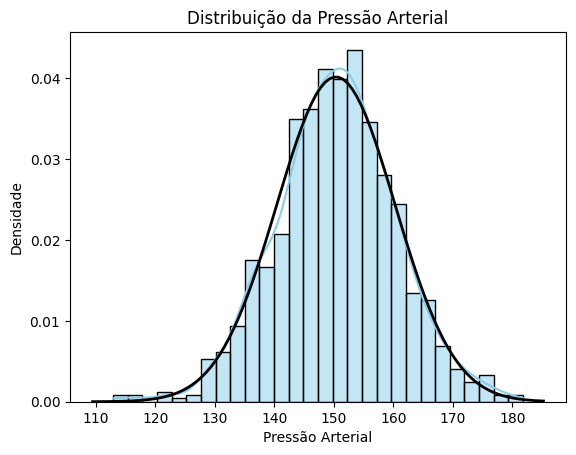

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot da distribuição da pressão arterial
sns.histplot(dados_pacientes['Pressao_Arterial'], kde=True, color='skyblue', stat='density')

# Ajuste de uma curva normal
mu, sigma = norm.fit(dados_pacientes['Pressao_Arterial'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Plot da curva normal
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribuição da Pressão Arterial')
plt.xlabel('Pressão Arterial')
plt.ylabel('Densidade')
plt.show()


Reflexão:

É interessante pois notei que olhando o gráfico parece uma distribuição normal e fui ao chatgpt e ele disse importante notar isso!

Segue a explicação dele:

Às vezes, mesmo que os testes estatísticos mostrem que os dados não seguem exatamente uma distribuição normal, a visualização pode sugerir que a diferença não é tão significativa.

É por isso que é sempre útil combinar análises estatísticas com visualizações dos dados. Isso permite uma compreensão mais completa do comportamento dos dados. Se o teste estatístico indicar que os dados não seguem uma distribuição normal, mas a visualização sugerir o contrário, pode ser necessário investigar mais profundamente a natureza dos dados e as suposições subjacentes ao teste estatístico.

Se os resultados do teste de normalidade sugerirem que os dados não seguem uma distribuição normal, mas a visualização dos dados se assemelha a uma distribuição normal, pode ser útil investigar mais a fundo para entender por que isso está acontecendo. Aqui estão algumas abordagens que você pode considerar:

Rever o tamanho da amostra: Às vezes, os testes de normalidade podem ser sensíveis ao tamanho da amostra. Se a amostra for pequena, os testes de normalidade podem não ter poder estatístico suficiente para detectar uma distribuição normal. Nesse caso, você pode tentar aumentar o tamanho da amostra para ver se os resultados do teste mudam.

Explorar diferentes métodos de teste de normalidade: Existem vários testes de normalidade disponíveis, como Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, entre outros. Experimente diferentes testes para ver se os resultados são consistentes.

Considerar a transformação dos dados: Às vezes, é possível transformar os dados de forma a torná-los mais próximos de uma distribuição normal. Por exemplo, a transformação logarítmica ou a transformação de Box-Cox são comumente usadas para lidar com dados assimétricos.

Investigar a presença de outliers: Outliers podem distorcer a distribuição dos dados e afetar os resultados dos testes de normalidade. Analise os dados em busca de outliers e considere removê-los ou tratá-los de forma adequada.

Explorar a natureza dos dados: Considere se os dados podem ter uma distribuição específica que não é capturada pelos testes de normalidade padrão. Dependendo do contexto dos dados, pode haver razões biológicas, físicas ou sociais para a distribuição observada.

Consultar especialistas: Se você estiver lidando com dados em um domínio específico, pode ser útil consultar especialistas nesse campo para obter insights sobre a natureza dos dados e as suposições subjacentes.

Ao explorar essas abordagens, você pode obter uma compreensão mais completa da distribuição dos seus dados e tomar decisões mais informadas sobre como analisá-los adequadamente.
